<h2> Exploratory Data Analysis Practice</h2>

<h4>Titanic: Machine Learning from Disaster <a href="https://www.kaggle.com/c/titanic/data">On Kaggle</a></h4>

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

<h3>Exploring continous features</h3>

In [2]:
# 1. Importing libraries and viewing the different variables/columns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv("./titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Observing above data, we can say passengerid, name , sex, ticket, cabin, embarked 
# are general properties and they are non-numeric features so we can drop them.

In [3]:
# Drop non-numeric or categorical features

drop_list = ["PassengerId", "Name", "Ticket", "Sex", "Cabin","Embarked"]
titanic.drop(drop_list, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [4]:
# We have droped the unwanted features. Now we need to details about the availble numeric features.

titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### We can observe from above data: 
<ol>
    <li>Age have missing values, as count is only 714 whereas other features count is 891.</li>
    <li>As survived is binary, from mean we can say 38.38% people survived.</li>
    <li>Pclass is either 1, 2 or 3. Similary sibsp range from 0 to 8 and parch from 0 to 6.</li>
</ol>
    Now we need to determine which features are strong indicator for survival i.e observe each feture and for that how many survived and how many didn't. 

In [5]:
# Group the data into two: survived and not survived. Find mean of all features for each group.
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


#### Observations:

<ul><li>A simple observation we can make from above is average age of survived people is 28.34 and not survived is 30.62. But the age have missing values so we need to observe it more.</li>
    <li>Fare and pclass between two groups stand out, so they might be useful</li></ul>

In [6]:
# Check weather age is missing
titanic.groupby(titanic["Age"].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


<h3>Plotting continous features</h3>

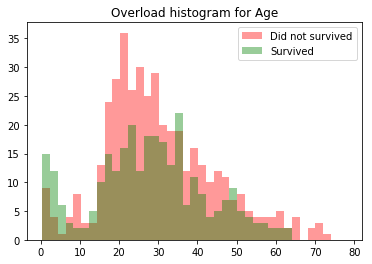

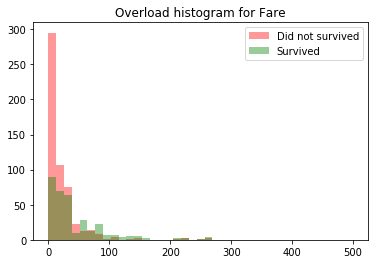

In [10]:
# Generating histogram for Age and Fare 

for var in ['Age','Fare']:
    died = list(titanic[titanic["Survived"] == 0][var].dropna())
    survived = list(titanic[titanic["Survived"] == 1][var].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin,xmax,width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin,xmax,width))
    plt.legend(['Did not survived','Survived'])
    plt.title("Overload histogram for {}".format(var))
    plt.show()

#### Observations:

<ul>
    <li> Although there is some visible diff.for low age but like we show in initial analysis, relatively there is not much differnce in age of people that survived and people that didn't survived. </li>
    <li> The Fare may be useful but as we can see in histogram except for first bar all other are similiar. So we can say it may be affected by outliers.</li>
</ul>


<Figure size 432x288 with 0 Axes>

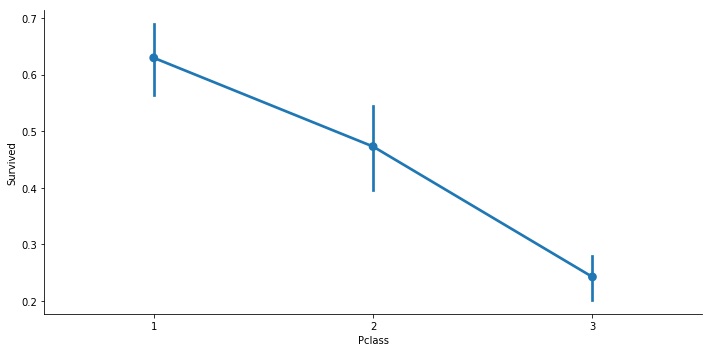

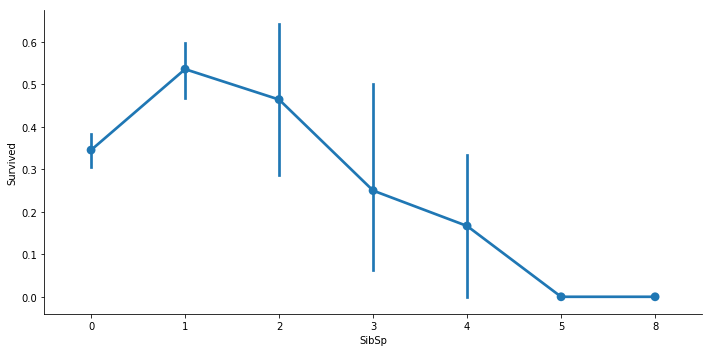

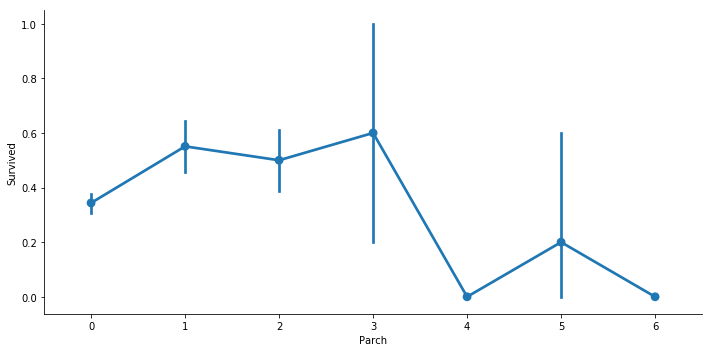

In [12]:
# Generating categorical plots for Pclass, SibSp, and Parch

for i,col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=titanic,kind='point',aspect=2)

#### Observations:


<ul>
  <li>Better class are more likely to survive i.e first class is more likely to survive than second class.</li>
  <li>Person with less siblings are more likely to survive</li>
  <li>Similiarly person with less parents and childers are more likely to suvive</li>
</ul>

We can combine Parch and SibSp as they are related to number of family members. 


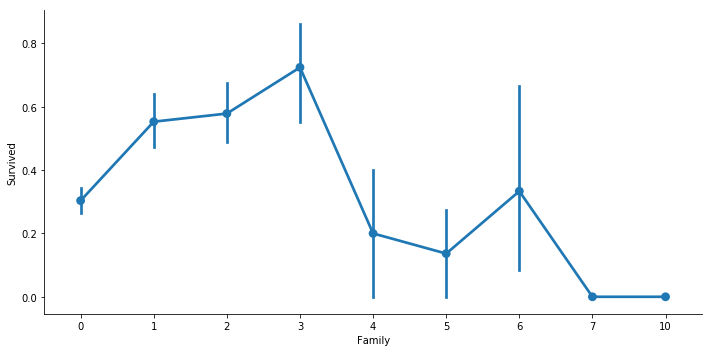

In [13]:
# Generating categorical plot for number of family members

titanic['Family'] = titanic["Parch"] + titanic["SibSp"]
sns.catplot(x='Family', y='Survived', data = titanic, kind='point', aspect=2)

### Cleaning: Filling missing values and removing Parch and SibSp

In [15]:
# Fill missing age value with average of age

titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
titanic.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Family      0
dtype: int64

In [19]:
titanic.drop(['Parch','SibSp'],axis=1,inplace=True)
titanic.head(10)

,Survived,Pclass,Age,Fare,Family
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,1
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,1
4,0,3,35.000000,8.0500,0
5,0,3,29.699118,8.4583,0
6,0,1,54.000000,51.8625,0
7,0,3,2.000000,21.0750,4
8,1,3,27.000000,11.1333,2
9,1,2,14.000000,30.0708,1


#### Observation
 - Missing values are filled by average age
 - Dropped Parch and SibSp to counter multi colinearity

### Exploring Categorical features

In [23]:
titanic = pd.read_csv("./titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### From abov data:
 - We can say sex, ticket & cabin, embarked are categorical features
 - We need to drop other feautres

In [24]:
drop_lst = ['PassengerId','Pclass','Name','Age','SibSp','Parch','Fare']
titanic.drop(drop_lst,axis=1,inplace=True)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [26]:
# Check how many non-null values are present
titanic.info()

# Check survived percentage of missing values for cabin
titanic.groupby(titanic['Cabin'].isnull()).mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Sex         891 non-null object
Ticket      891 non-null object
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


,Survived
Cabin,
False,0.666667
True,0.299854


#### Observations:
 - We can see cabin have only 204 not null values and embarked have 899, all other have 891 non null values.
 - Around 30% people with missing cabin values survived.
 - Approx 66% people with non missing cabin values survived.
 - So we can say missing values mean something.

In [27]:
# Storing if cabin value missing or not.

titanic['Cabin_ind'] =  np.where(titanic['Cabin'].isnull(),0,1)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0


### Plotting Categorical features

<Figure size 432x288 with 0 Axes>

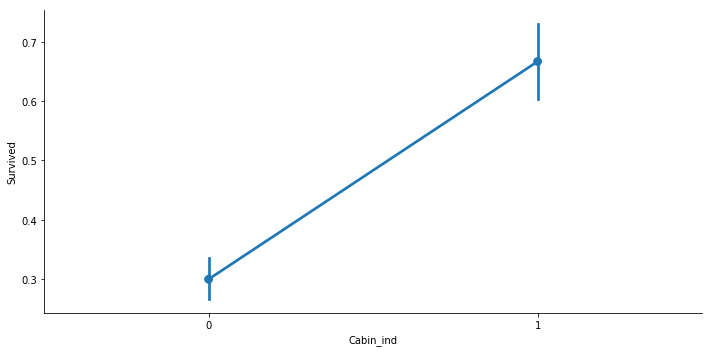

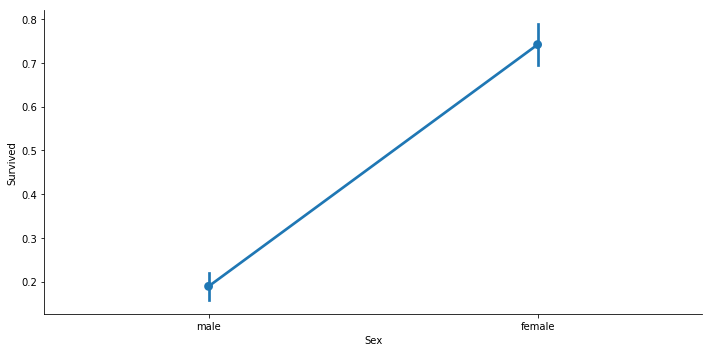

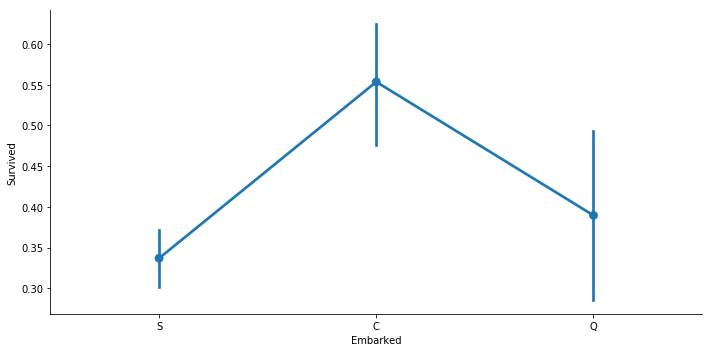

In [28]:
# Generating categorical plots for Cabin_ind, Sex, and Embarked

for i,col in enumerate(['Cabin_ind','Sex','Embarked']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=titanic,kind='point',aspect=2)

In [30]:
# Check relation between sex and Embarked

titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [32]:
# Check relation between sex and Embarked

titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


#### Observations:
 - People with cabin had 66% survival rate while without cabin had 30% survival rate.
 - Over 70% of women survived while only about 20% of men survived
 - Embarked may not give clear picture but it may be related to other fetures.
 - In southampton more than double men boarded than women, in other two they are somewhat equal.
 - As per 2nd point more women are likely to survive than men therefor S have less percentage of survival.
 - For Queens town there are high number people without cabin and as per 1st they are less likely to survive.

### Cleaning Categorical Data

In [38]:
titanic = pd.read_csv("./titanic.csv")
titanic.head()

# dropping features - done above
drop_list = [ "Name", "Ticket"]
titanic.drop(drop_list, axis=1, inplace=True)
titanic.head()

# creating canin indicator - done above
titanic['Cabin_ind'] =  np.where(titanic['Cabin'].isnull(),0,1)
titanic.head()

# converting sex to numeric values 0,1
gender_num = {'male':0,'female':1}
titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,1
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,1,35.0,1,0,53.1000,C123,S,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0


In [39]:
# Drop cabin and embarked as we have cabin_ind and embarked is not much useful.
titanic.drop(['Cabin','Embarked'],axis=1,inplace=True)

In [40]:
# All numeric fetures in one place
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,0
